# Exercise Sheet 2: Linear Algebra and TensorFlow Basics (Deadline: 14 Nov 14:00)

# Linear Algebra (11 points)
For theoretical tasks you are encouraged to write LaTeX. Jupyter notebooks support them simply by typing an expression between dollar signs or in the blocks like \ begin{equation} \ end{equation}.


Alternatively, you can upload the solutions in the written form as images and paste them inside cells. But if you do this, make sure that the images have high quality, so we can read them without any problems.

### 1. Orthogonal vectors (1 point)
Let $a, b$ be non-zero vectors in $R^n$. Show that $a^T b$ = 0 **if and only if** a and b are orthogonal vectors (i.e. angle between them equals $\frac{\pi}{2} + k \pi$ radians).

Hint: be careful to prove 2 directions: 
1.) $a^T b$ = 0 $\implies$ orthogonality and 2.) orthogonality $\implies$ $a^T b$ = 0.


### 2. Interpretation of matrix multiplication (2 points)
Let 
$$
A=\begin{bmatrix} 2 & 4 \\ 4 & 2 \\ 2 & 0 \end{bmatrix} \ \ \ \ 
B=\begin{bmatrix} 0.6 & -0.8 \\ 0.8 & 0.6 \end{bmatrix}
$$
a. Are the column vectors of B orthogonal? Orthonormal? Is B a rotation matrix? Justify your answers.(0.5 points)

b. Calculate $A \cdot B$. (0.5 points)

c. What is the interpretation of a matrix multiplication, when the column vectors of B are orthonormal (you may want to draw a simple picture visualizing row vectors of A and column vectors of B, but you don't need to submit it)? (1 point)


### 3. Property of $X^T X$ matrix (1 point)
Let $X \in R^{m×n}$ be a matrix obtained by stacking all training vectors (also called "design matrix"), like in the lecture. Obviously, it can be an arbritrary matrix. However a covariance matrix $C = X^T X$ has some interesting properties, namely it is always a positive semidefinite matrix ($v^T Cv \geq 0$ for all non-zero $v \in R^n$). Prove this statement.

Hint: $v^T C v$ can be represented as a squared norm of some vector.



### 4. Eigendecomposition (4 points)
Consider the following matrix:
$$
M=\begin{bmatrix}
    1 & -1 & 0 \\
    -1 & 2 & -1 \\
    0 & -1 & 1
  \end{bmatrix}
$$
Is the matrix M:

a. Symmetric? What does it imply for its eigendecomposition? (0.5 points)

b. Singular? What does it imply for its eigendecomposition? (0.5 points)

c. Find the eigendecomposition of M (3 points).




### 5. Rayleigh-Ritz principle (3 points)
On the lecture we saw that the exact solution for decoding matrix D in PCA problem is a matrix that contains the $l$ eigenvectors corresponding to the largest eigenvalues of $X^T X$, where X is a design matrix. But where does it come from?

If you want to see full derivation of PCA, you can find it in Deep Learning Book, chapter 2.12. In this exercise we would like to focus only on Raleigh-Ritz principle, which allows to solve optimization problems of type $min_{||v||_2 = 1} v^T C v$ or $max_{||v||_2 = 1} v^T C v$ using eigendecomposition of C.

So prove that $min_{||v||_2 = 1} v^T C v = \lambda_{min}$, where $\lambda_{min}$ is the smallest eigenvalue of C. For which vector $v$ this minimum is attained? (the proof for $max_{||v||_2 = 1} v^T C v = \lambda_{max}$ is analogous).

# TensorFlow (9 points)

### 1. A simple computational graph in Tensorflow (2 + 1 = 3 points)
To get started with TensorFlow we ask you to specify a very simple computational graph of the function $f(x) = x^2 + 2x + 5$ and also taking its derivative.
If you don't know how to proceed, please study the example given on the lecture and also the official TenorFlow starting guide: https://www.tensorflow.org/get_started/get_started.

This exercise requires around 10 lines of code, it is simple enough. However, it is very important to understand the notion of computational graph. 

Actually, this simple example will be a backbone for all neural networks in the future. All what we will need is to specify first the forward pass (f), and then take derivatives with respect to parameters (x), in order to update them, so they minimize the loss function f. But we will come back to this in several weeks.

In [20]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt


### Define a simple comp. graph (note that all its components are special TensorFlow objects)
# Specify an input x to the comp. graph
y = tf.placeholder(tf.float32)

# Specify f(x) = x^2 + 2x + 5 
f = tf.get_variable("f", dtype=tf.int32)

# Take derivative of f with respect to x. That will be very important in the future, since you will only
# need to specify forward pass of your neural network, and all derivatives will be determined automatically by 
# TensorFlow.


### Execute the comp. graph
# Create a TensorFlow session


# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1

# Evaluate values of f and its derivative based on a particular input x
    
# Plot the function f (use matplotlib library)

# Plot the derivative of the function f


#### Tensorflow Questions:
1.) In the exercise above x should be a TF placeholder, but f is a TF tensor. What is the difference between a placeholder and other tensors in computational graph? And how TF Variable differs from tensors? (0.5 point)

...


2.) What does tf.Session().run(...) accept as an argument and what does it return? What is the fundamental difference between these 2 types of objects? (0.5 point)

...


### 2. A pure Python implementation (1 point)
Please do the same, but in pure Python, calculating the expression for the derivative by hand. There is no need to use NumPy library, since we deal with 1-dimensional x (0.5 point). 

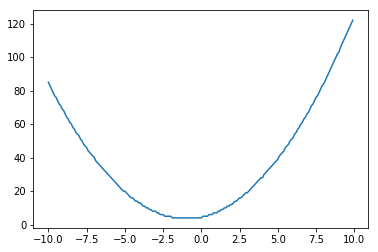

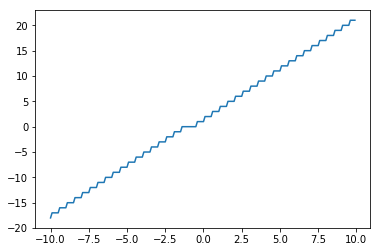

In [24]:
# Evaluate the function value and its derivative for values from -10 to 10 with step 0.1
import numpy as np
# Define f
def f (x) : 
    return x * x + 2 * x + 5

# Define f_derivative_val
def f_derivative_val(x) : 
    return 2 * x + 2

# Plot the function f
x_values =  np.arange(-10.0, 10.0, 0.1)
plt.plot(x_values, f(x_values).astype(np.int))
plt.show()

# Plot the derivative of the function f
plt.plot(x_values, f_derivative_val(x_values).astype(np.int))
plt.show()

### 3. A more complicated computational graph (5 points)
Okay, you could easily take the derivative of $f(x) = x^2 + 2x + 5$ by hand. But what if you need to take the derivative of the function $f(x) = \sigma(-6 \sigma (x + 5 x^{-2} + 3 x^{-3}) + 2 \sigma (-x + 4 x^{-2}))$ (where $\sigma = \frac{1}{1 + exp(-x)}$) with respect to x?
It resembles a neural network much more than the previous example.
Please, implement it in TensorFlow (0.5 point) and in pure Python (0.5 point) in the same way as before (but using new cells with the code below). 

Note that in pure Python implementation you will need to somehow overcome the numerical errors for small values of x (roughly from -0.1 to 0.1). You can just skip these values.

For pure Python implementation you will need to derive the derivative by hand (3 points). Please write down your derivation for the new $f(x)$ (you are encouraged to write LaTeX for them):

$\frac{df}{dx}$ = ...

Hint 1: you may want to use a new variable to simplify your derivations, for example setting $a = -6 \sigma (x + 5 x^{-2} + 3 x^{-3}) + 2 \sigma (-x + 4 x^{-2})$ can help. Don't worry if the final expression is quite ugly, it is supposed to be so.

Hint 2: your derived expression for $\frac{df}{dx}$ should produce exactly the same values (up to the float type precision) as TensorFlow derivative.



In [127]:
# Please paste the code from your above TensorFlow implementation, 
# but specify the new f(x) and produce the corresponding plots


In [129]:
# Please paste the code from your above pure Python implementation, 
# but specify the new f(x) and its derivative that you calculated manually and produce the corresponding plots

#### Questions (1 point)
1.) What is the main difference in the program structure between TensorFlow and plain Python? (0.5 point)

...

2.) Does TensorFlow provide numerical or automatic differentiation? What are advantages of this way of differentiation? (0.5 point)

...


## Submission instructions
You should provide a single Jupyter notebook as a solution. The naming should include the assignment number and matriculation IDs of all team members in the following format:
**assignment-1_matriculation1_matriculation_2_matriculation3.ipynb** (in case of 3 team members). 
Make sure to keep the order matriculation1_matriculation_2_matriculation3 the same for all assignments.

Please, submit your solution to your tutor (with **[NNIA][assignment-2]** in email subject):
1. Maksym Andriushchenko s8mmandr@stud.uni-saarland.de
2. Marius Mosbach s9msmosb@stud.uni-saarland.de
3. Rajarshi Biswas rbisw17@gmail.com
4. Marimuthu Kalimuthu s8makali@stud.uni-saarland.de

**If you are in a team, please submit only 1 solution to only 1 tutor.**